# Motion in 2D and 3D

## Displacement and Velocity Vectors

### Displacement Vector
To describe motion in 2D and 3D, we must first define a coordinate system, including a convention of axes. *Recall that the sign of the acceleration due to gravity was determined by the convention that we chose.*  We usually use the Cartesian coordinate system to locate a particle at point $P(x,y,z)$ in 3 dimensions.  If the particle is moving , the variables $x,y,z$ are functions of time $t$.

The position vector $\vec{r}(t)$ locates the point P at time t from the origin, by

\begin{align}
\vec{r}(t) = x(t)\hat{i} + y(t)\hat{j} + z(t)\hat{k}.
\end{align}

```{figure-md} 3D-position-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/071341953cf3ad04041c5b06a713ba5ab3548eaf" alt="Position Vector"  style="max-width:100%; height:auto;">

Image Credit: OpenStax.
```

{numref}`3D-position-fig` shows the position vector $\vec{r}(t)$ for a particle located ar a time $t$. *Note that the orientation of the coordinate syste follows the right-hand rule.*

We can now define the 3D displacement vector $\Delta \vec{r}$ as the difference between the position vector $\vec{r}(t_2)$ at time $t_2$ and the initial position vector $\vec{r}(t_1)$ at time $t_1$, or

\begin{align}
\Delta \vec{r} = \vec{r}(t_2) - \vec{r}(t_1).
\end{align}

Three dimensional vector addition is performed in the same way as in 2D, by adding the corresponding components or graphically by using the head-to-tail method.

```{figure-md} 3D-displacement-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/85b4b075e91a332c7c7e45097501e6ec8404dbdf" alt="Displacement Vector"  style="max-width:100%; height:auto;">

Image Credit: OpenStax.
```
See the `python` code below that demonstates how to plot a 3D vector in `matplotlib`.

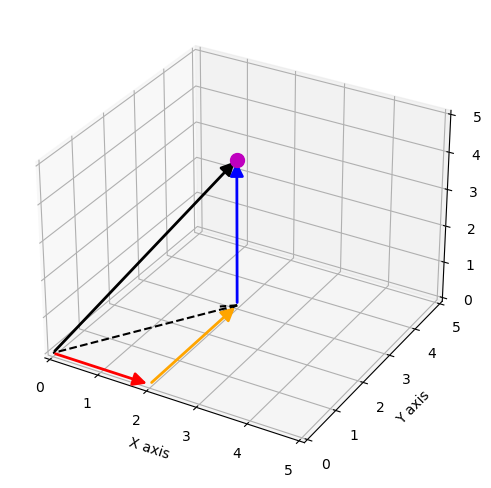

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Custom class to draw true 3D arrows (matplotlib does not support these natively)
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, mutation_scale=20, lw=2, arrowstyle="-|>", **kwargs):
        super().__init__((0, 0), (0, 0),mutation_scale=mutation_scale,lw=lw, arrowstyle=arrowstyle, **kwargs)
        self._verts3d = xs, ys, zs
    def do_3d_projection(self, renderer=None):
        xs, ys, zs = proj3d.proj_transform(*self._verts3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Set up the 3D plotting environment
fig, ax = plt.subplots(figsize=(8, 6), dpi=100,
                       subplot_kw=dict(projection="3d"))
# Define the vector components and endpoints
x0, y0, z0 = 0, 0, 0        # vector tail
u, v, w    = 2, 3, 4        # vector components
x1, y1, z1 = u, v, w        # vector head
# Draw the vector and its component projections
ax.add_artist(Arrow3D([x0, x1], [y0, y1], [z0, z1], color="k"))
ax.add_artist(Arrow3D([x0, x1], [y0, y0], [z0, z0], color="r"))
ax.add_artist(Arrow3D([x1, x1], [y0, y1], [z0, z0], color="orange"))
ax.add_artist(Arrow3D([x1, x1], [y1, y1], [z0, z1], color="b"))
# Plot the x-y vector
ax.quiver(x0, y0, z0, u, v, 0, color="k",
          ls="--", arrow_length_ratio=0.1)
ax.plot(x1, y1, z1, "mo", ms=10, zorder=5)  # mark the endpoint

# Formatting
ax.set_xlim(0, 5); ax.set_ylim(0, 5); ax.set_zlim(0, 5)
ax.set_xlabel("X axis"); ax.set_ylabel("Y axis"); ax.set_zlabel("Z axis")
plt.show()




### **Example Problem**: Polar Orbiting Satellite

```{exercise}
:class: etamu-exercise

**The Problem**

> A satellite is in a circular polar orbit around Earth at an altitude of $400\ \text{km}$, meaning it passes directly over the North and South Poles. What are the magnitude and direction of the displacement vector from when the satellite is directly over the North Pole to when it is at latitude $-45^\circ$?

---

**The Model**

Although the satellite moves along a curved path, the **displacement** depends only on the initial and final positions. We therefore model the motion using position vectors drawn from the center of Earth, which we take to be the origin of a Cartesian coordinate system.

We choose the $y$-axis to point north and the $x$-axis to point east. With this choice, the displacement vector is found by subtracting the initial position vector from the final position vector.

---

**The Math**

The radius of Earth is $6370\ \text{km}$, and the satellite orbits at an altitude of $400\ \text{km}$. The radius of the orbit is therefore

$$ r = 6370\ \text{km} + 400\ \text{km} = 6770\ \text{km}. $$

When the satellite is directly over the North Pole, its position vector points entirely in the $+y$ direction. The initial position vector is

$$ \vec{r}(t_1) = 6770\,\hat{j}\ \text{km}. $$

At latitude $-45^\circ$, the satellite’s position vector makes an angle of $-45^\circ$ with the $+x$-axis. The final position vector is therefore

$$ \vec{r}(t_2) = 6770(\cos(-45^\circ)\,\hat{i} + \sin(-45^\circ)\,\hat{j})\ \text{km}. $$

Evaluating the trigonometric functions gives

$$ \vec{r}(t_2) = (4.79\times10^3\,\hat{i} - 4.79\times10^3\,\hat{j})\ \text{km}. $$

The displacement vector is the difference between the final and initial position vectors,

$$ \Delta\vec{r} = \vec{r}(t_2) - \vec{r}(t_1)
= (4.79\times10^3\,\hat{i} - 1.16\times10^4\,\hat{j})\ \text{km}. $$

The magnitude of the displacement is

$$ |\Delta\vec{r}| = \sqrt{(4.79\times10^3)^2 + (1.16\times10^4)^2}
= 1.25\times10^4\ \text{km}. $$

The direction of the displacement relative to the $+x$-axis is

$$ \theta = \tan^{-1}\!\left(\frac{-1.16\times10^4}{4.79\times10^3}\right) = -67.5^\circ. $$

---

**The Conclusion**

The displacement of the satellite from the North Pole to latitude $-45^\circ$ has a magnitude of

$$ |\Delta\vec{r}| = 1.25\times10^4\ \text{km}, $$

and points $67.5^\circ$ south of east. Even though the satellite follows a curved path along its orbit, the displacement represents the straight-line separation between the two positions.

---

**The Verification**

We can verify the analytical result numerically by computing the position vectors and their difference using Python. The magnitude and direction obtained numerically match the analytical values, confirming the result.

```



Orbit radius r        = 6770 km
Displacement |dr|     = 1.25e+04 km
Direction angle theta = -67.5 deg


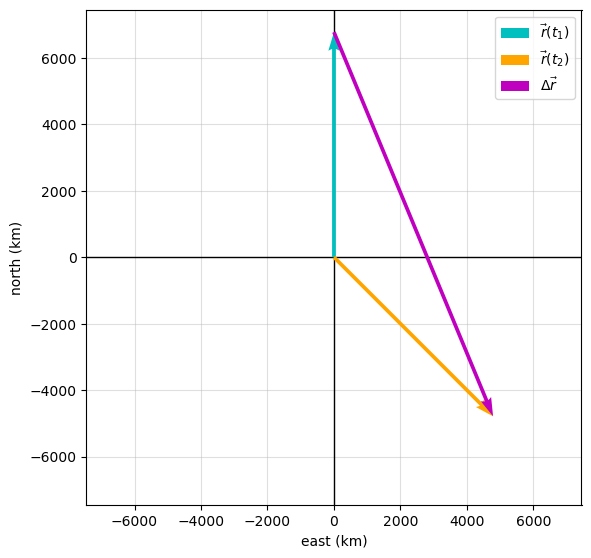

In [9]:
# Verification of polar orbit displacement problem
import numpy as np
import matplotlib.pyplot as plt

# Given values
R_earth = 6370.0          # km
h = 400.0                 # km
r = R_earth + h           # km
lat2 = -45.0              # degrees

# Position vectors (x is east, y is north)
r1 = np.array([0.0, r])   # over North Pole
r2 = r * np.array([np.cos(np.radians(lat2)),
                   np.sin(np.radians(lat2))])
# Displacement vector
dr = r2 - r1
# Magnitude and direction (angle from +x axis)
dr_mag = np.linalg.norm(dr)
theta = np.degrees(np.arctan2(dr[1], dr[0]))

# Print results
print(f"Orbit radius r        = {r:.0f} km")
print(f"Displacement |dr|     = {dr_mag:.2e} km")
print(f"Direction angle theta = {theta:.1f} deg")

# Create a vector plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot axes and vectors
ax.axhline(0, lw=1,color='k',zorder=2)
ax.axvline(0, lw=1,color='k',zorder=2)
ax.quiver(0, 0, r1[0], r1[1], color='c', zorder=5,
          angles='xy', scale_units='xy', scale=1, label=r'$\vec{r}(t_1)$')
ax.quiver(0, 0, r2[0], r2[1], color='orange', zorder=5,
          angles='xy', scale_units='xy', scale=1, label=r'$\vec{r}(t_2)$')
ax.quiver(r1[0], r1[1], dr[0], dr[1], color='m', zorder=5,
          angles='xy', scale_units='xy', scale=1, label=r'$\Delta\vec{r}$')

# Formatting
ax.set_aspect('equal', adjustable='box')
lim = 1.1 * r
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel("east (km)")
ax.set_ylabel("north (km)")
ax.grid(True, alpha=0.4)
ax.legend()

plt.tight_layout()
plt.show()

### **Example Problem**: Brownian Motion


### Velocity Vector
### **Example Problem**: Calculating the Velocity Vector
### The Independence of Perpendicular Motions


## Acceleration Vector
### Instantaneous Acceleration
### **Example Problem**: Finding an Acceleration Vector
### **Example Problem**: Finding a Particle Acceleration
### Constant Acceleration
### **Example Problem**: A Skier


## Projectile Motion
### **Example Problem**: A Fireworks Projectile Explodes
### **Example Problem**: The Tennis Player
### Time of Flight, Trajectory, and Range
### **Example Problem**: Comparing Golf Shots


## Uniform and Nonuniform Circular Motion
### Centripetal Acceleration
### **Example Problem**: Creating an Acceleration of 1 $g$ 
### Equations of Motion for Uniform Circular Motion

### **Example Problem**: Circular Motion of a Proton
### Nonuniform Circular Motion
### **Example Problem**: Total Acceleration during Circular Motion




## Relative Motion in One and Two Dimensions
### Reference Frames
### Relative Motion in 1D
### Relative Velocity in 2D
### **Example Problem**: Motion of a Car Relative to a Truck
### **Example Problem**: Flying a Plane in a Wind